Créer les utilisateurs et leurs liens


In [1]:
import json
import random

In [2]:
noms = json.load(open('nom.json', 'r', encoding='utf8'))
prenoms = json.load(open('prenom.json', 'r', encoding='utf8'))

In [4]:
# Création des personnes

data = []

print(len(prenoms))

for prenom in prenoms:
    nbPersonne = random.randint(1, len(noms))
    for x in range(nbPersonne):
        if random.random() < 0.8:
            age = random.randint(15, 20)
        else:
            age = random.randint(20, 30)
        nom = random.choice(noms)
        uid = prenom[0] + nom.lower().replace(' ', '_') + str(random.randint(1, 1000000)) 
        data.append({
            'prenom': prenom[0],
            'nom': nom,
            'age': age,
            'id': uid
        })

d = open('data.json', 'w', encoding='utf8')
d.write(json.dumps(data, indent=4, ensure_ascii=False))
d.close()



405


KeyboardInterrupt: 

In [5]:
data = json.load(open('data.json', encoding='utf8'))

## Nouveau système de stockage des  liens


#### Structure des liens :



##### Rapidité de la fonction getLiens(id) +++++

##### Rapidité de la fonction getCercleLien(id, degres) +++

In [93]:
#      --- Génération de liens simple ---
#      Génération faite au hasard qui ne comporte pas de logique particulière

def generateLiens():
    liensFinal = {}
    for personne in data:
        liensFinal[personne['id']] = []
    for personne in data:
        nbLiens = random.randint(5, 15)
        for i in range(nbLiens):
            randomPersonne = random.choice(data)
            if randomPersonne['id'] != personne['id'] and randomPersonne['id'] not in liensFinal[personne['id']]:
                liensFinal[personne['id']].append(randomPersonne['id'])
            if personne['id'] not in liensFinal[randomPersonne['id']]:
                liensFinal[randomPersonne['id']].append(personne['id'])
    db = open('liensBon.json', 'w', encoding='utf-8')
    db.write(json.dumps(liensFinal, indent=4, ensure_ascii=False))
    db.close()
    print('Nombre de personnes :', len(liensFinal))
                



#      --- Génération de liens plus complexe ---
#      L'algorithme va chercher à créer des groupes de personnes qui ont des liens entre elles et va créer des liens entre les groupes

def generateLiens2():
    liensFinal = {}
    for personne in data:
        liensFinal[personne['id']] = []
    for personne in data:

        nbGroupeAmis = random.randint(3, 7)
        nbPersonneExterieur = random.randint(0, 2)
        personnes = []
        personnesExterieur = []
        randomPersonne = random.choice(data)

        for i in range(nbGroupeAmis):
            while randomPersonne['id'] == personne['id'] or randomPersonne['id'] in personnes or randomPersonne['id'] in personnesExterieur:
                randomPersonne = random.choice(data)

            personnes.append(randomPersonne['id'])
        
        for i in range(nbPersonneExterieur):
            while randomPersonne['id'] == personne['id'] or randomPersonne['id'] in personnes or randomPersonne['id'] in personnesExterieur:
                randomPersonne = random.choice(data)

            personnesExterieur.append(randomPersonne['id'])
        

        # toutes les personnes du groupe d'amis sont liées entre elles
        for i in range(len(personnes)):
            for j in range(len(personnes)):
                if i != j and personnes[j] not in liensFinal[personnes[i]]:
                    liensFinal[personnes[i]].append(personnes[j])
                    liensFinal[personnes[j]].append(personnes[i])

        # l'user entretient des liens avec les personnes extérieures
        for personnesExterieur in personnesExterieur:
            if personnesExterieur not in liensFinal[personne['id']]:
                liensFinal[personne['id']].append(personnesExterieur)
            if personne['id'] not in liensFinal[personnesExterieur]:
                liensFinal[personnesExterieur].append(personne['id'])
            

            

    db = open('liensBon2.json', 'w', encoding='utf-8')
    db.write(json.dumps(liensFinal, indent=4, ensure_ascii=False))
    db.close()
    print('Nombre de personnes :', len(liensFinal))



# --- génération de lien avec un score de lien en plus ---


def generateLiens3():
    liensFinal = {}
    for personne in data:
        liensFinal[personne['id']] = []
    for personne in data:

        nbGroupeAmis = random.randint(3, 7)
        nbPersonneExterieur = random.randint(0, 2)
        personnes = []
        personnesExterieur = []
        randomPersonne = random.choice(data)

        for i in range(nbGroupeAmis):
            if randomPersonne['id'] != personne['id'] and randomPersonne['id'] not in personnes and randomPersonne['id'] not in personnesExterieur:
                personnes.append(randomPersonne['id'])

            randomPersonne = random.choice(data)

        
        for i in range(nbPersonneExterieur):
            if randomPersonne['id'] != personne['id'] and randomPersonne['id'] not in personnes and randomPersonne['id'] not in personnesExterieur:
                personnesExterieur.append(randomPersonne['id']) 
                
            randomPersonne = random.choice(data)

        

        # toutes les personnes du groupe d'amis sont liées entre elles
        for i in range(len(personnes)):
            for j in range(len(personnes)):
                if i != j and personnes[j] not in liensFinal[personnes[i]]:
                    score = random.randint(20, 50)
                    liensFinal[personnes[i]].append([personnes[j], score])
                    liensFinal[personnes[j]].append([personnes[i], score])

        # l'user entretient des liens avec les personnes extérieures
        for personnesExterieur in personnesExterieur:
            score = random.randint(10, 20)
            if personnesExterieur not in liensFinal[personne['id']]:
                liensFinal[personne['id']].append([personnesExterieur, score])
            if personne['id'] not in liensFinal[personnesExterieur]:
                liensFinal[personnesExterieur].append([personne['id'], score])
            

            

    db = open('liensBon3.json', 'w', encoding='utf-8')
    db.write(json.dumps(liensFinal, indent=4, ensure_ascii=False))
    db.close()
    print('Nombre de personnes :', len(liensFinal))






def generateLiens4():
    liensFinal = {}
    personnes = []
    personnes2 = []
    for personne in data:
        liensFinal[personne['id']] = []
        personnes.append(personne['id'])
        personnes2.append(personne['id'])

        
    while len(personnes) > 0 :
        groupe = []
        for x in range(random.randint(15, 25)):
            try:
                groupe.append(personnes.pop(random.randint(0, len(personnes)-1)))
            except:
                print("je crois qu'il n'y a plus personne. NB personne restant :", len(personnes))
        
        for i in range(len(groupe)):
            for j in range(len(groupe)):
                if i != j and groupe[j] not in liensFinal[groupe[i]]:
                    liensFinal[groupe[i]].append(groupe[j])
                    liensFinal[groupe[j]].append(groupe[i])
        
        for y in range(random.randint(1, 3)):
            randomPersonne = random.choice(personnes2)

            
            if randomPersonne != groupe[y] and randomPersonne not in liensFinal[groupe[y]]:
                liensFinal[groupe[y]].append(randomPersonne)
                liensFinal[randomPersonne].append(groupe[y])

    db = open('liensBon4.json', 'w', encoding='utf-8')
    db.write(json.dumps(liensFinal, indent=4, ensure_ascii=False))
    db.close()
    print('Nombre de personnes :', len(liensFinal))



In [94]:
generateLiens4()

je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
je crois qu'il n'y a plus personne. NB personne restant : 0
Nombre de personnes : 96788


In [95]:
liensFinals = json.load(open('liensBon.json', 'r', encoding='utf-8'))
liens4 = json.load(open('liensBon4.json', 'r', encoding='utf-8'))

In [88]:
randomPersonne = random.choice(data)

In [89]:
liensFinals[randomPersonne['id']]

['cvasseur417947',
 'épascal6904',
 'fbourdon206478',
 'vpoirier111154',
 'lpereira672074',
 'fbrossard681360',
 'rlafon373398',
 'gmorel353289',
 'fboyer355429',
 'hroques325925',
 'drodriguez679188',
 'dleclerc524816',
 'hmillet202881',
 'mda_silva605749',
 'mdeschamps314839',
 'mdenis589207']

In [8]:
def getCercleLiens(_id_, _degres_):
    liensFormate = []

    try :
        liens = liensFinals[_id_]
    except KeyError:
        print("L'id : ", _id_, " n'existe pas")
        return
    
    #print("L'id : ", _id_, " a ", len(liens), " liens")
    #print(liens)


    if _degres_ == 1:
        for lien in liens:
            liensFormate.append([lien, _degres_])
        return liensFormate
    

    elif _degres_ == 2:
        liens1 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 1])
            liens1.append(lien)
        #print(liens1)
        for lien2 in liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                if lien not in liens1 and lien != _id_:
                    liensFormate.append([lien, _degres_])
        return liensFormate

    elif _degres_ == 3:
        _liens1 = []
        _liens2 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 2])
            _liens1.append(lien)
        for lien2 in _liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                if lien not in _liens1 and lien != _id_:
                    liensFormate.append([lien, _degres_ - 1])
                    _liens2.append(lien)
        _liens1.extend(_liens2)
        for lien3 in _liens2:
            liens3 = liensFinals[lien3]
            for lien in liens3:
                if lien not in _liens1 and lien != _id_:
                    liensFormate.append([lien, _degres_])
                    _liens1.append(lien)
        
        return liensFormate



In [9]:
cercle = getCercleLiens(randomPersonne['id'], 3)
print(len(cercle))

6498


In [96]:
allLiens = [len(liensFinals[personne['id']]) for personne in data]
allLiens4 = [len(liens4[personne['id']]) for personne in data]

In [25]:
personnesTirees = []
nbPersonneCercle2 = []
nbPersonneCercle3 = []
for x in range(1000):
    if x % 100 == 0:
        # afficher une barre droite pour voir l'avancement
        print('|', end='')
    personneTiree = random.choice(data)
    if personneTiree['id'] not in personnesTirees:
        personnesTirees.append(personneTiree['id'])
        nbPersonneCercle2.append(len(getCercleLiens(personneTiree['id'], 2)))
        nbPersonneCercle3.append(len(getCercleLiens(personneTiree['id'], 3)))

|

KeyboardInterrupt: 

In [97]:
print('Nombre de liens moyen :', sum(allLiens) / len(allLiens))
print('Nombre de liens total :', sum(allLiens))
print('Nombre de personnes :', len(allLiens))
print('\n')
print('Nombre de liens maximum :', max(allLiens))
print('Nombre de liens minimum :', min(allLiens))
print('\n')
print('\n')
print('\n')

print('Nombre de liens moyen :', sum(allLiens4) / len(allLiens4))
print('Nombre de liens total :', sum(allLiens4))
print('Nombre de personnes :', len(allLiens4))
print('\n')
print('Nombre de liens maximum :', max(allLiens4))
print('Nombre de liens minimum :', min(allLiens4))

print('\n')
print('\n')
print('Ce test a été réalisé sur '+str(len(personnesTirees))+' personnes')
print('\n')
print('Nombre de personnes dans le cercle 2 moyen :', sum(nbPersonneCercle2) / len(nbPersonneCercle2))
print('Nombre minimum de personnes dans le cercle 2 :', min(nbPersonneCercle2))
print('Nombre maximum de personnes dans le cercle 2 :', max(nbPersonneCercle2))
print('\n')
print('Nombre de personnes dans le cercle 3 moyen :', sum(nbPersonneCercle3) / len(nbPersonneCercle3))
print('Nombre minimum de personnes dans le cercle 3 :', min(nbPersonneCercle3))
print('Nombre maximum de personnes dans le cercle 3 :', max(nbPersonneCercle3))


Nombre de liens moyen : 20.024455511013763
Nombre de liens total : 1938127
Nombre de personnes : 96788


Nombre de liens maximum : 38
Nombre de liens minimum : 5






Nombre de liens moyen : 19.691366698351036
Nombre de liens total : 1905888
Nombre de personnes : 96788


Nombre de liens maximum : 28
Nombre de liens minimum : 8






NameError: name 'personnesTirees' is not defined

In [12]:
def getDoublons(liens):
    doublons = []
    total = 0
    for lien in liens:
        if liens.count(lien) > 1:
            doublons.append(lien)
            total += 1
    return total, doublons

In [13]:
getDoublons(cercle)

(0, [])

In [14]:
def getPersonne(id):
    for personne in data:
        if personne['id'] == id:
            return personne

In [15]:
print(getPersonne(randomPersonne['id']))

{'prenom': 'vespasien', 'nom': 'PUJOL', 'age': 28, 'id': 'vpujol578383'}


## Test de donnés structurés autrement - dataV2.json

In [16]:
data2 = json.load(open('dataV2.json', 'r', encoding='utf8'))

In [17]:
uidRandomUser = random.choice(list(data2.keys()))

In [18]:
data2[uidRandomUser]

{'prenom': 'sacha', 'nom': 'SCHMITT', 'age': 27}

Après plusieurs tests il s'avère que stocker les informatio de l'user sous forme 

    uid :{
        prenom: prenom,
        nom: nom,
        age: age,
    }

est moins optimisé que de stocker nos users dans un array tel que :

    [
        {
            prenom: prenom,
            nom: nom,
            age: age,
            uid: uid
        }
    ]




## Afficher nos liens à l'aide de networkx

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
liensEntreUser = json.load(open('liensBon.json', 'r', encoding='utf8'))

In [27]:
allLiens = [len(liensEntreUser[personne['id']]) for personne in data]

In [28]:
print('Nombre de liens moyen :', sum(allLiens) / len(allLiens))
print('Nombre de liens total :', sum(allLiens))
print('Nombre de personnes :', len(allLiens))
print('\n')
print('Nombre de liens maximum :', max(allLiens))
print('Nombre de liens minimum :', min(allLiens))
print('Index de la personne avec le plus de liens :', allLiens.index(max(allLiens)))
print('Index de la personne avec le moins de liens :', allLiens.index(min(allLiens)))
print('\n')

Nombre de liens moyen : 19.98670325628766
Nombre de liens total : 3532350
Nombre de personnes : 176735


Nombre de liens maximum : 41
Nombre de liens minimum : 5
Index de la personne avec le plus de liens : 57058
Index de la personne avec le moins de liens : 39991




In [111]:
def getGraph(liensr, _id_):
    print('Nombre de liens :', len(liensr))
    G = nx.Graph()
    for lien in liensr:
        if lien[1] == 1:
            G.add_edge(_id_, lien[0])
        elif lien[1] == 2:
            G.add_edge(lien[2], lien[0])
        elif lien[1] == 3:
            G.add_edge(lien[2], lien[0])
        elif lien[1] == 4:
            G.add_edge(lien[2], lien[0])
    return G

In [24]:
def getCercleLiensPoids(_id_, _degres_):
    liensFormate = []

    try :
        liens = liensEntreUser[_id_]
    except KeyError:
        print("L'id : ", _id_, " n'existe pas")
        return
    
    #print("L'id : ", _id_, " a ", len(liens), " liens")
    #print(liens)


    if _degres_ == 1:
        for lien in liens:
            liensFormate.append([lien, _degres_])
        return liensFormate
    

    elif _degres_ == 2:
        liens1 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 1])
            liens1.append(lien)
        #print(liens1)
        for lien2 in liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_, lien2])
        return liensFormate

    elif _degres_ == 3:
        _liens1 = []
        _liens2 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 2])
            _liens1.append(lien)
        for lien2 in _liens1:
            liens2 = liensFinals[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_ - 1, lien2])
                _liens2.append(lien)
        _liens1.extend(_liens2)
        for lien3 in _liens2:
            liens3 = liensFinals[lien3]
            for lien in liens3:
                liensFormate.append([lien, _degres_, lien3])
                _liens1.append(lien)
        
        return liensFormate
        


2
Nombre de liens : 182


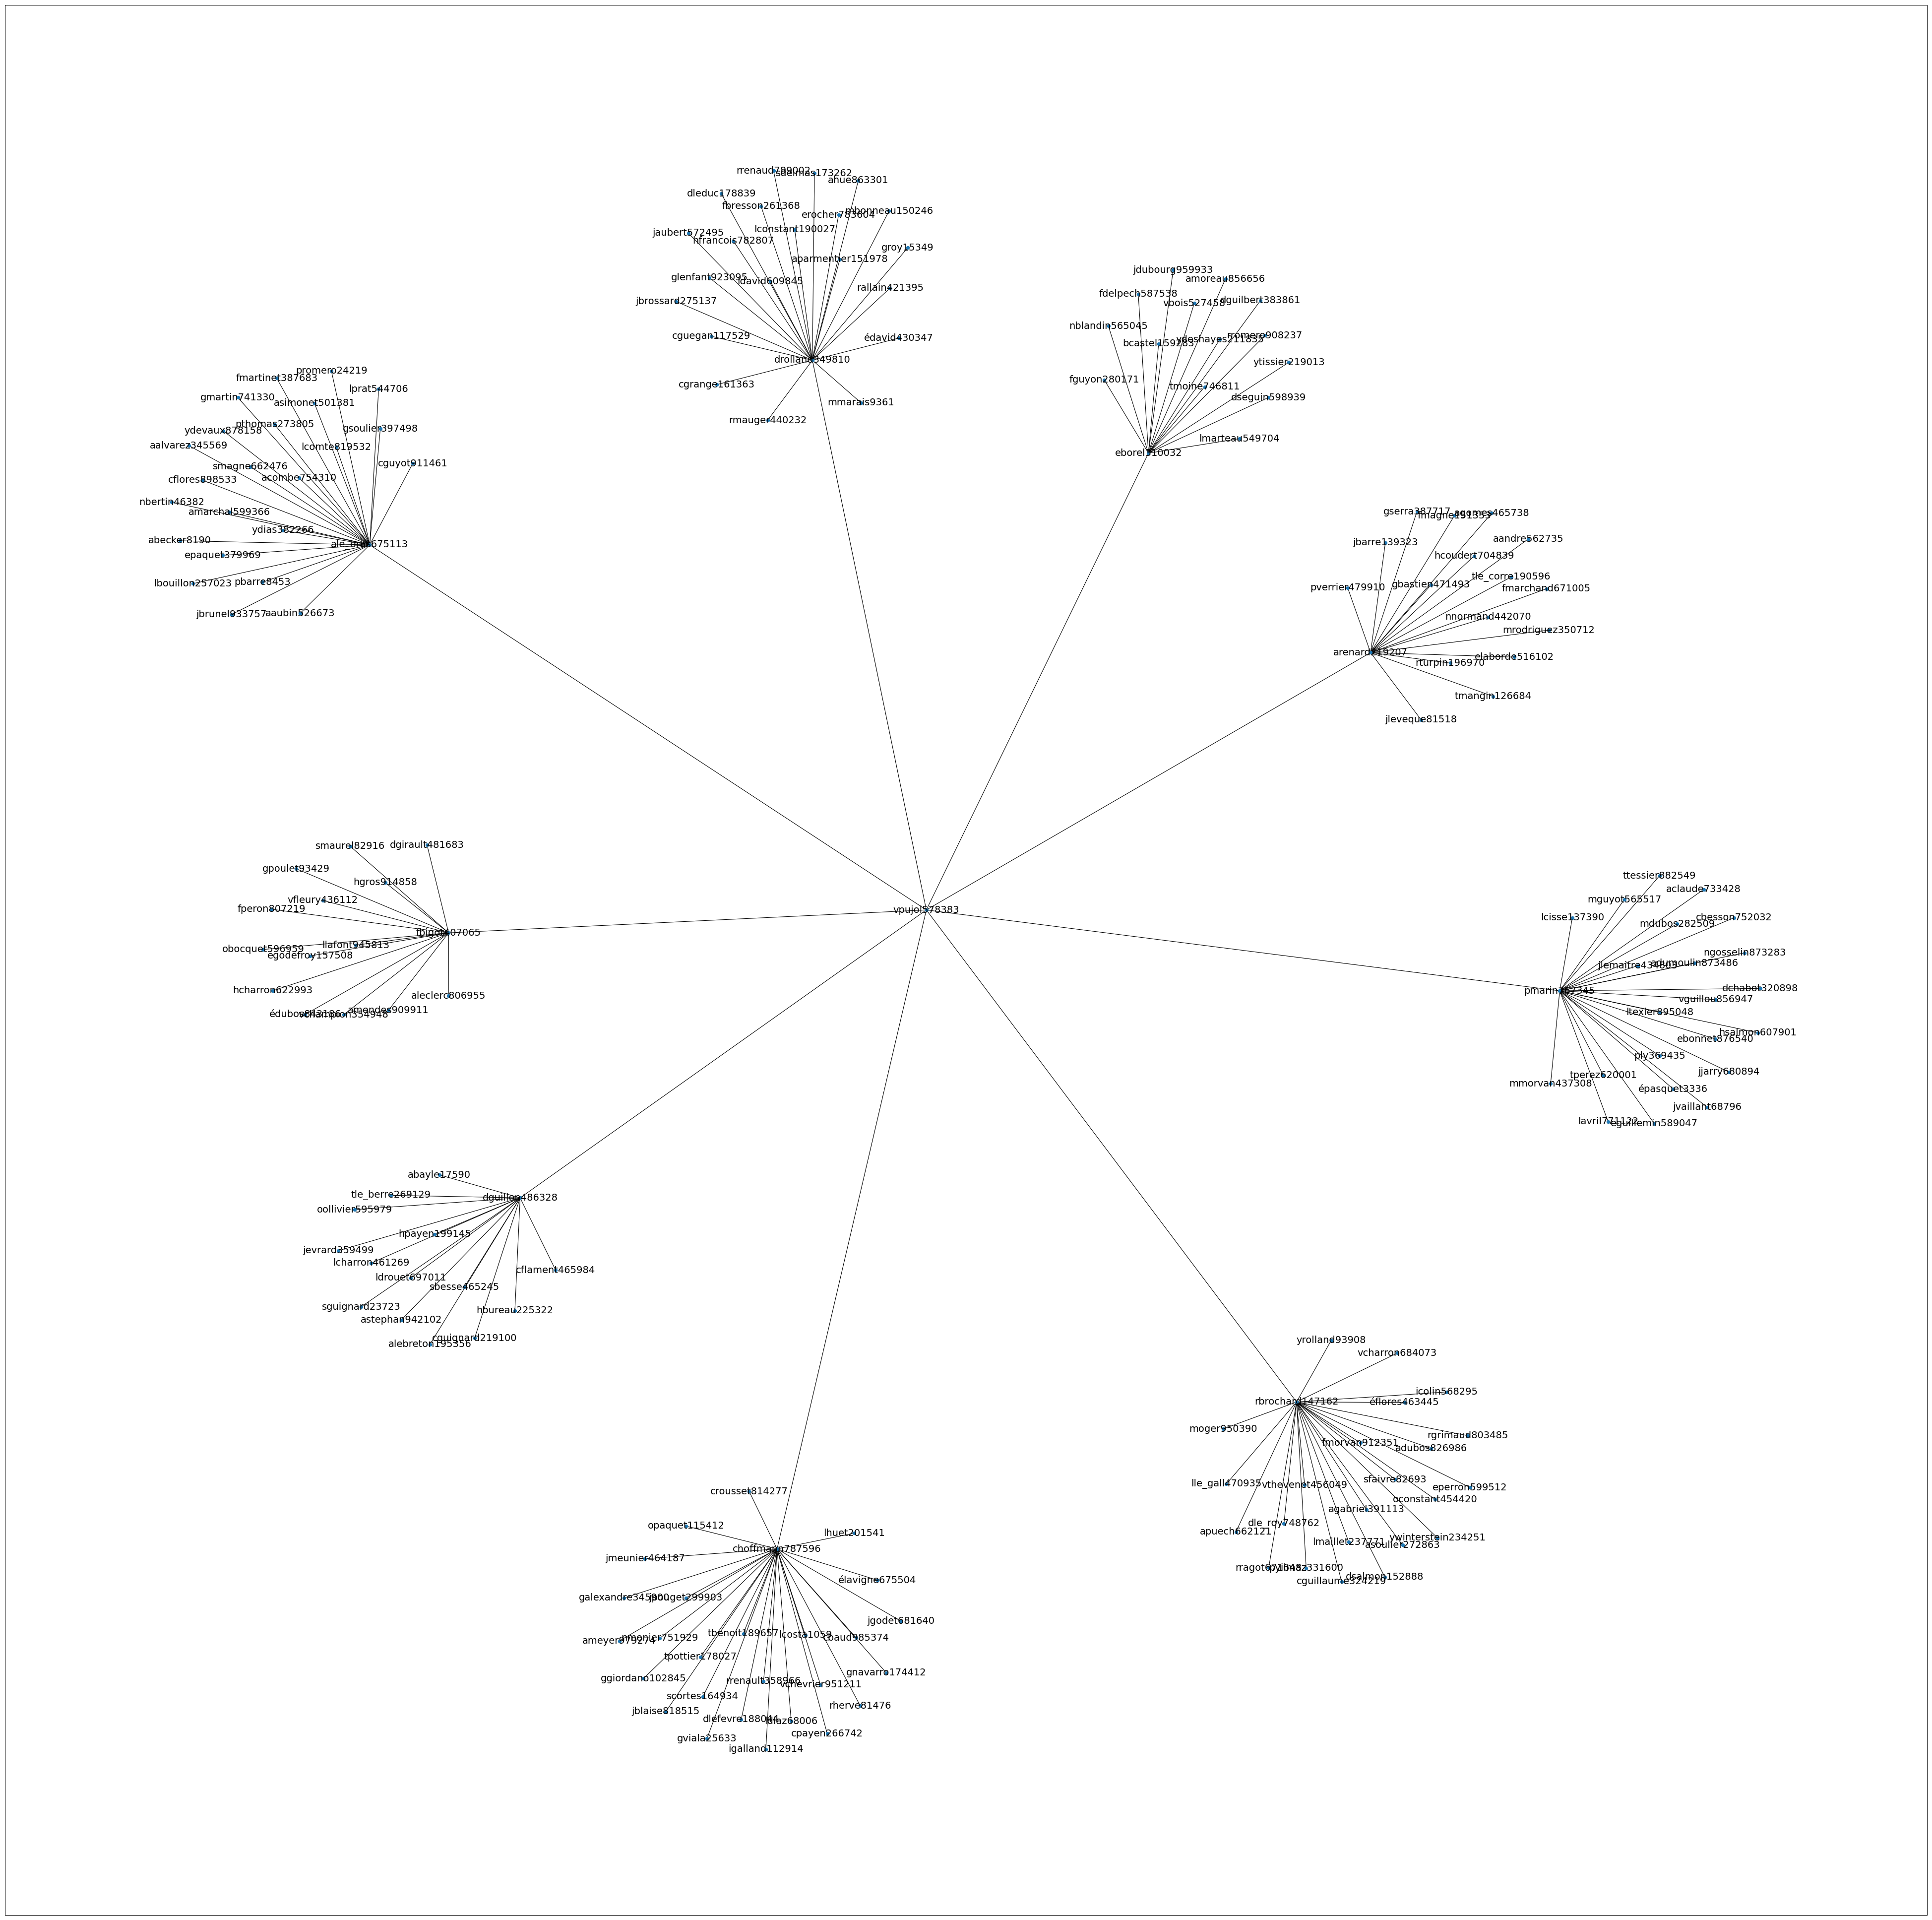

In [25]:
liensUser = getCercleLiensPoids(randomPersonne['id'], 2)
print(len(getDoublons(liensUser)))
g = getGraph(liensUser, randomPersonne['id'])
plt.figure(figsize=(50, 50))
nx.draw_networkx(g, with_labels=True, node_size=18, width=0.8, font_size=14)
plt.savefig("filename1.png")

In [41]:
userCercle = getCercleLiensPoids(randomPersonne['id'], 1)
for user in userCercle:
    print(randomPersonne['age'], getPersonne(user[0])['age'])


20 17
20 18
20 21
20 20
20 19
20 18
20 19
20 18
20 20
20 18


--- J'ai écrit moi même un dataset leger (~ 100 liens) pour avoir un echatillion correct afin de réussir à coder le bon algorithme de création de lien et de traitement de lien ---

In [32]:
echantillonCorrect = json.load(open('echantillonValide.json', 'r', encoding='utf8'))

In [41]:
user = "noe"
liensFormate = []
liens1 = []
liensNoe = echantillonCorrect[user]

for lien in liensNoe:
    liensFormate.append([lien, 1])
    liens1.append(lien)
#print(liens1)
for lien2 in liens1:
    liens2 = echantillonCorrect[lien2]
    for lien in liens2:
        liensFormate.append([lien, 2, lien2])

In [39]:
print(liensFormate)

[['ziyad', 1], ['nicolas', 1], ['isaac', 1], ['gustave', 1], ['marina', 2, 'nicolas'], ['loan', 2, 'nicolas'], ['benjamin', 2, 'nicolas'], ['jules', 2, 'isaac'], ['jules', 2, 'gustave']]


Nombre de liens : 18


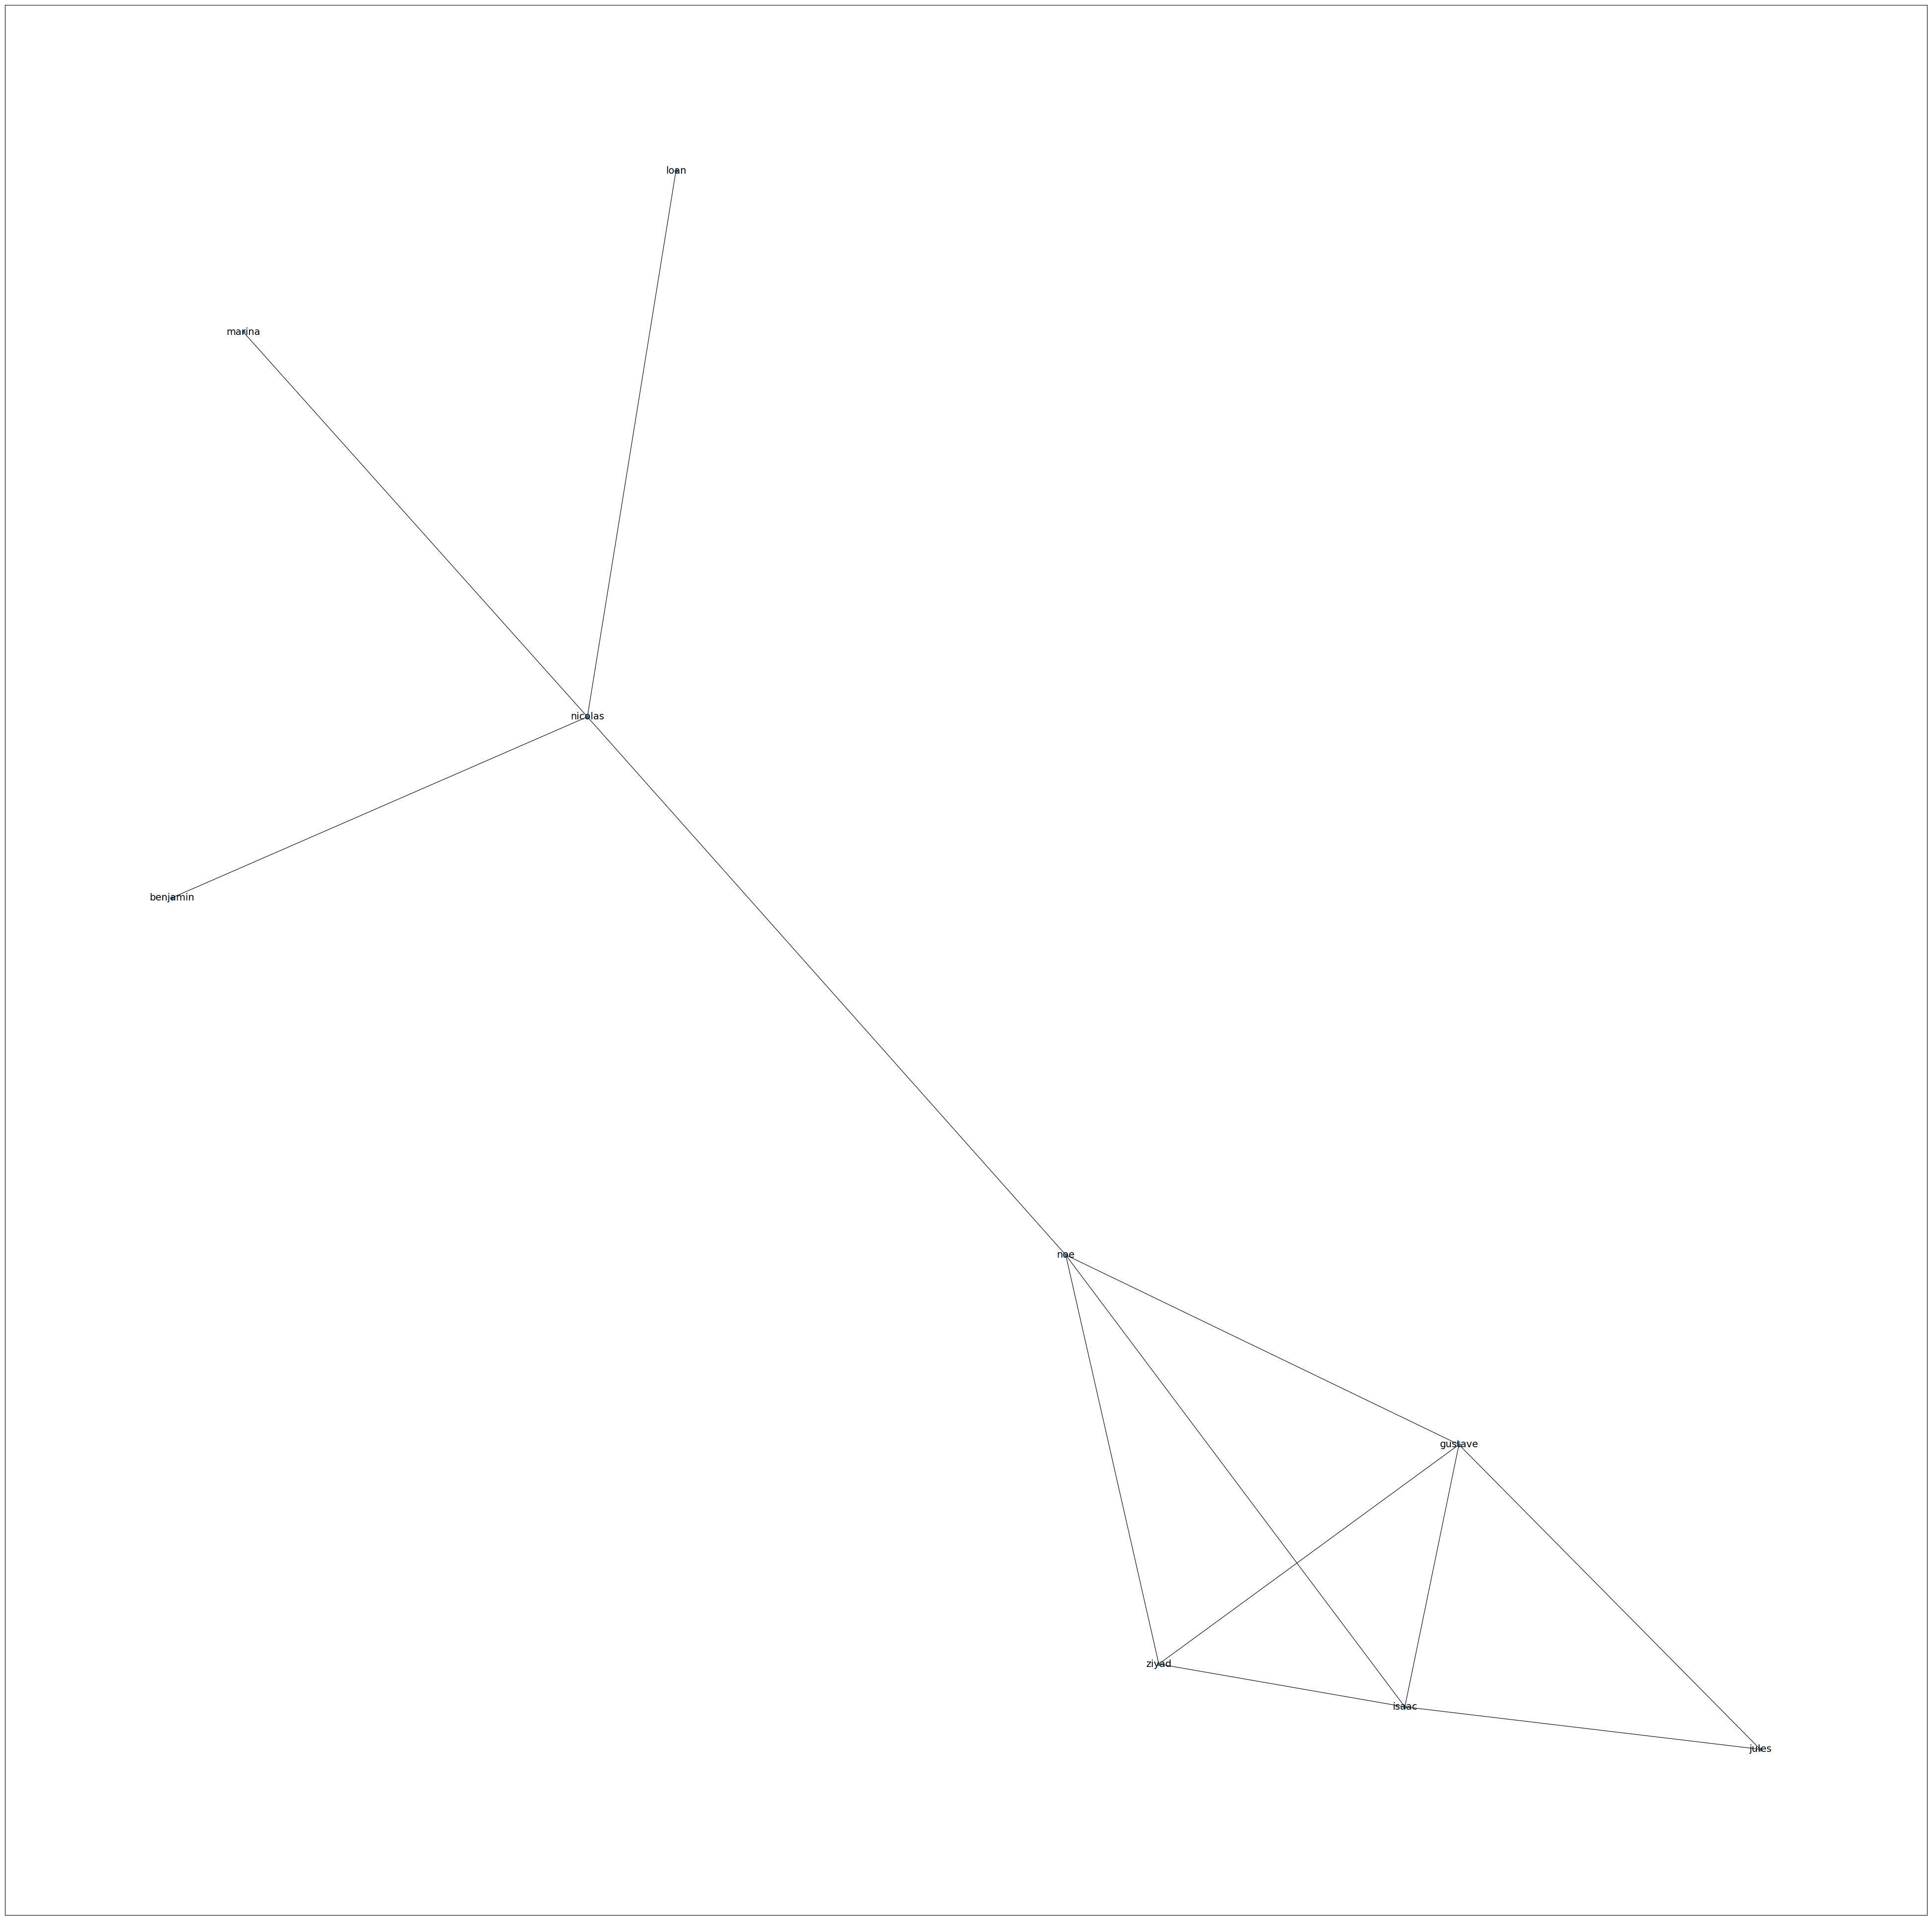

In [42]:
a = getGraph(liensFormate, user)
plt.figure(figsize=(50, 50))
nx.draw_networkx(a, with_labels=True, node_size=18, width=0.8, font_size=14)
plt.savefig("filename1.png")

## Traitement liensBon2.json

In [98]:
liensBon2 = json.load(open('liensBon4.json', 'r', encoding='utf8'))

In [61]:
allLiens = [len(liensBon2[personne['id']]) for personne in data]

In [62]:
print('Nombre de liens moyen :', sum(allLiens) / len(allLiens))
print('Nombre de liens total :', sum(allLiens))
print('Nombre de personnes :', len(allLiens))
print('\n')
print('Nombre de liens maximum :', max(allLiens))
print('Nombre de liens minimum :', min(allLiens))
print('Index de la personne avec le plus de liens :', allLiens.index(max(allLiens)))
print('Index de la personne avec le moins de liens :', allLiens.index(min(allLiens)))
print('\n')

Nombre de liens moyen : 23.85717237674092
Nombre de liens total : 2309088
Nombre de personnes : 96788


Nombre de liens maximum : 92
Nombre de liens minimum : 0
Index de la personne avec le plus de liens : 82636
Index de la personne avec le moins de liens : 1184




In [109]:
def getCercleLiensPoidsV2(_id_, _degres_):
    liensFormate = []

    try :
        liens = liensBon2[_id_]
    except KeyError:
        print("L'id : ", _id_, " n'existe pas")
        return
    
    #print("L'id : ", _id_, " a ", len(liens), " liens")
    #print(liens)


    if _degres_ == 1:
        for lien in liens:
            liensFormate.append([lien, _degres_])
        return liensFormate
    

    elif _degres_ == 2:
        liens1 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 1])
            liens1.append(lien)
        #print(liens1)
        for lien2 in liens1:
            liens2 = liensBon2[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_, lien2])
        return liensFormate

    elif _degres_ == 3:
        _liens1 = []
        _liens2 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 2])
            _liens1.append(lien)
        for lien2 in _liens1:
            liens2 = liensBon2[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_ - 1, lien2])
                _liens2.append(lien)
        _liens1.extend(_liens2)
        for lien3 in _liens2:
            liens3 = liensBon2[lien3]
            for lien in liens3:
                liensFormate.append([lien, _degres_, lien3])
                _liens1.append(lien)
        
        return liensFormate


    elif _degres_ == 4:
        _liens1 = []
        _liens2 = []
        _liens3 = []
        for lien in liens:
            liensFormate.append([lien, _degres_ - 3])
            _liens1.append(lien)
        for lien2 in _liens1:
            liens2 = liensBon2[lien2]
            for lien in liens2:
                liensFormate.append([lien, _degres_ - 2, lien2])
                _liens2.append(lien)
        _liens1.extend(_liens2)
        for lien3 in _liens2:
            liens3 = liensBon2[lien3]
            for lien in liens3:
                liensFormate.append([lien, _degres_ - 1, lien3])
                _liens3.append(lien)
        _liens1.extend(_liens3)
        
        for lien4 in _liens3:
            liens4 = liensBon2[lien4]
            for lien in liens4:
                liensFormate.append([lien, _degres_, lien4])
                _liens1.append(lien)

        return liensFormate

In [113]:
randomUtilisateur = random.choice(data)

In [116]:
liensP = getCercleLiensPoidsV2(randomUtilisateur['id'], 2)
a = getGraph(liensP, randomUtilisateur["id"])
plt.figure(figsize=(100, 100))
nx.draw_networkx(a, with_labels=True, node_size=18, width=0.8, font_size=14)
plt.savefig(randomUtilisateur["id"]+".png")

Nombre de liens : 510
